**IMPORT LIBRARIES**

In [ ]:
import skimage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import ast
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
PATH = 'D:/Pictures/dataset/new_images/train.csv'
IMG_ROOT = 'D:/Pictures/dataset/new_images/train/'

**IMPORT CSV AND PLOT IMAGES**

In [ ]:
# Get image as numpy array
def load_image(name, path):
    img_path = path + name
    img = cv2.imread(img_path)
    return img

# Plot numpy array
def plot_image(img):
    plt.imshow(img)
    plt.title(img.shape)
    
# Plot a grid of examples
def plot_grid(img_names, img_root, rows=5, cols=5):
    fig = plt.figure(figsize=(25,25))
    
    for i,name in enumerate(img_names):
        fig.add_subplot(rows,cols,i+1)
        img = load_image(name, img_root)
        plot_image(img)
        
    plt.show()

In [ ]:
data = pd.read_csv(PATH, delimiter=',')
data.head()

,Unnamed: 0,img_name,class,bbox,bbox_count,object_count,stratify_group,fold
0,0,BloodImage_00322.jpg,Platelets,"['168', '374', '198', '406']",4.0,2.0,2_0,2.0
1,1,BloodImage_00322.jpg,Platelets,"['527', '244', '564', '282']",4.0,2.0,2_0,2.0
2,2,BloodImage_00322.jpg,Platelets,"['565', '383', '602', '421']",4.0,2.0,2_0,2.0
3,3,BloodImage_00322.jpg,WBC,"['307', '174', '528', '387']",4.0,2.0,2_0,2.0
4,4,BloodImage_00047.jpg,WBC,"['278', '147', '383', '259']",21.0,3.0,3_1,3.0


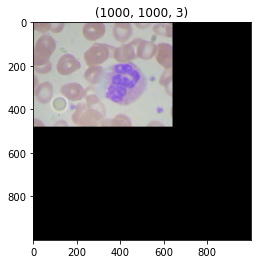

In [ ]:
name = 'BloodImage_00322.jpg'
img = load_image(name, IMG_ROOT)
plot_image(img)

**Create new images and create new excel files with classes, new names and bounding boxes**

In [ ]:
def add_noise(clr_img):
  noise_img=skimage.util.random_noise(clr_img, mode='s&p')
  noise_img=skimage.util.random_noise(noise_img, mode='gaussian')
  return noise_img

def concat_name(row_old_name):
  pd.concat(row_old_name['img_name'+'_augmented_'+i])
  return new_name

In [ ]:
campione=data[data['class']=='Platelets']

univoci=pd.DataFrame(campione['img_name'].unique(), columns=['img_name'])
sample_to_augment=univoci.sample(n=60,replace=True)
new_df=pd.DataFrame()
i=0
for element in sample_to_augment['img_name']:
  img = load_image(element, IMG_ROOT)
  new_img=add_noise(img)
  name_no_ext=element.split(".")[0]
  new_name=name_no_ext+'_augmented_'+str(i)+'_.jpg'
  new_img = cv2.convertScaleAbs(new_img, alpha=(255.0))
  cv2.imwrite(IMG_ROOT+new_name,new_img)
  new_df=new_df.append({'new_img_name':new_name},ignore_index = True)
  i=i+1

sample_to_augment=sample_to_augment.reset_index()
new_df=new_df.reset_index()
final_df=pd.concat((sample_to_augment,new_df), axis=1)


In [ ]:
subsample=pd.merge(data,final_df,on='img_name')
print(subsample)
subsample.to_csv("D:/Pictures/dataset/new_images/subsample.csv",index=False,header=False)  # This CSV will be use in training

     Unnamed: 0              img_name      class  \
0             4  BloodImage_00047.jpg        WBC   
1             5  BloodImage_00047.jpg  Platelets   
2             6  BloodImage_00047.jpg  Platelets   
3             7  BloodImage_00047.jpg  Platelets   
4             8  BloodImage_00047.jpg        RBC   
..          ...                   ...        ...   
833        3794  BloodImage_00296.jpg  Platelets   
834        3794  BloodImage_00296.jpg  Platelets   
835        3848  BloodImage_00258.jpg  Platelets   
836        3849  BloodImage_00258.jpg        WBC   
837        3850  BloodImage_00258.jpg  Platelets   

                             bbox  bbox_count  object_count stratify_group  \
0    ['278', '147', '383', '259']        21.0           3.0            3_1   
1    ['207', '214', '240', '242']        21.0           3.0            3_1   
2    ['258', '263', '291', '291']        21.0           3.0            3_1   
3      ['12', '277', '40', '311']        21.0           3.0    

In [ ]:
#platelets, WBC

In [ ]:
campione=data[data['class']=='WBC']

univoci=pd.DataFrame(campione['img_name'].unique(), columns=['img_name'])
sample_to_augment=univoci.sample(n=60,replace=True)
new_df=pd.DataFrame()
i=0
for element in sample_to_augment['img_name']:
  img = load_image(element, IMG_ROOT)
  new_img=add_noise(img)
  name_no_ext=element.split(".")[0]
  new_name=name_no_ext+'_augmented_'+str(i)+'_.jpg'
  new_img = cv2.convertScaleAbs(new_img, alpha=(255.0))
  cv2.imwrite(IMG_ROOT+new_name,new_img)
  new_df=new_df.append({'new_img_name':new_name},ignore_index = True)
  i=i+1

sample_to_augment=sample_to_augment.reset_index()
new_df=new_df.reset_index()
final_df=pd.concat((sample_to_augment,new_df), axis=1)

In [ ]:
subsample=pd.merge(data,final_df,on='img_name')
print(subsample)
subsample.to_csv("D:/Pictures/dataset/new_images/subsample.csv",index=False,header=False)  # This CSV will be use in training

     Unnamed: 0              img_name class                          bbox  \
0            76  BloodImage_00260.jpg   RBC    ['45', '88', '146', '180']   
1            77  BloodImage_00260.jpg   RBC  ['361', '124', '484', '234']   
2            78  BloodImage_00260.jpg   RBC   ['95', '414', '199', '479']   
3            79  BloodImage_00260.jpg   RBC   ['118', '68', '247', '150']   
4            80  BloodImage_00260.jpg   RBC      ['1', '3', '101', '100']   
..          ...                   ...   ...                           ...   
803        3843  BloodImage_00342.jpg   RBC   ['74', '324', '192', '422']   
804        3844  BloodImage_00342.jpg   RBC     ['203', '1', '302', '72']   
805        3845  BloodImage_00342.jpg   RBC  ['492', '413', '578', '480']   
806        3846  BloodImage_00342.jpg   RBC  ['322', '256', '440', '366']   
807        3847  BloodImage_00342.jpg   WBC  ['111', '106', '420', '362']   

     bbox_count  object_count stratify_group  fold  index  index  \
0      